In [1]:
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
import time
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_rows', 1000)

In [2]:
driver_path = '/Users/Luis/Downloads/chromedriver.exe'
driver = webdriver.Chrome(driver_path)
driver.get('https://www.nytimes.com/interactive/2020/nyregion/new-york-city-coronavirus-cases.html')

#sleep timer necessary to load full page
time.sleep(7)

In [3]:
#scroll some distance to remove advertisement
driver.execute_script('window.scrollTo(0,2400)')
time.sleep(1)

#Must expand table for webscrape to retrieve full table. 
expand_table_button = driver.find_element_by_class_name('expand')
expand_table_button.click()

#saves page with expanded table for webscraping
page = driver.page_source
driver.quit()

In [4]:
soup = bs(page, 'html.parser')

In [5]:
table = soup.find('table', {'class':"svelte-19yxb3p"})
table_headers = ['Zip_code','Borough','Neighborhood','Cases','Cases_per_10000','Deaths','Deaths_per_10000']

In [6]:
#Creates DataFrame from web scraped table
ny_cases_df = pd.DataFrame()
record_list = []
for i in table.find_all('tr')[1:]:
    row = i.find_all('td')
    
    #strips a row's information (zipcode, borough, neighborhood,total_cases,cases_per_1000,deaths,deaths_per_1000)
    zipcode = str(row[0].find_all('span')[0].find_all('span')[0]).lstrip('<span class="bolder">').rstrip('</span>')
    borough = str(row[0].find_all('span')[0].find_all('span')[1]).lstrip('<span class="lighter">').replace('</span>',"")
    neighborhood = str(row[0].find_all('span')[0].find_all('span')[2]).lstrip('<span class="neighborhood">').replace('</span>',"")
    total_cases = str(row[1].find_all('span')[0]).lstrip('<span>').rstrip('</span>').replace(',',"")
    cases_per_1000 =str(row[2].find_all('span')[0]).lstrip('<span>').rstrip('</span>').replace(',',"")
    total_deaths = str(row[5].find_all('span')[0]).lstrip('<span>').rstrip('</span>').replace(',',"")
    deaths_per_1000 = str(row[6].find_all('span')[0]).lstrip('<span>').rstrip('</span>').replace(',',"")
    
    #appends all scraped info into list
    record = [zipcode,borough,neighborhood,total_cases,cases_per_1000,total_deaths,deaths_per_1000]
    
    #appends record to record_list
    record_list.append(record)

#creates dataframe
ny_df = pd.DataFrame(record_list, columns = table_headers)
ny_df

,Zip_code,Borough,Neighborhood,Cases,Cases_per_10000,Deaths,Deaths_per_10000
0,11416,Queens,Ozone Park,883,3318,46,173
1,11230,Brooklyn,Ocean Parkway and Midwood,3471,3893,111,124
2,10004,Manhattan,Financial District,56,1534,4,110
3,11210,Brooklyn,Midwood and Flatbush,2329,3471,72,107
4,11223,Brooklyn,Gravesend,2758,3449,81,101
5,11219,Brooklyn,Borough Park,3801,4093,90,97
6,11204,Brooklyn,Bensonhurst and Borough Park,2703,3408,71,90
7,11235,Brooklyn,"Brighton Beach, Manhattan Beach and Sheepshead...",2660,3344,68,85
8,11218,Brooklyn,Kensington and Windsor Terrace,2172,2865,62,82
9,11691,Queens,"Edgemere, Bayswater and Far Rockaway",3121,4819,49,76


In [7]:
#cleaning
ny_df.drop(ny_df[ny_df['Deaths'] == '—'].index, inplace = True)
ny_df.columns
ny_df = ny_df.astype({'Cases':'int32','Cases_per_10000':'int32','Deaths_per_10000': 'int32','Deaths':'int32'})

Text(0.5, 1.0, 'Distribution of Cases in all 175 New York Neighborhoods')

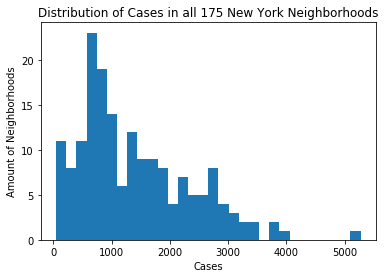

In [8]:
plt.hist(ny_df['Cases'], bins = 30)
plt.xlabel('Cases')
plt.ylabel('Amount of Neighborhoods')
plt.title('Distribution of Cases in all 175 New York Neighborhoods')

Text(0.5, 1.0, 'Distribution of Deaths in all 175 NY neighborhoods')

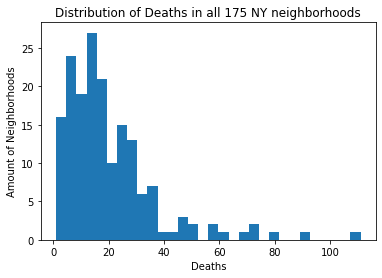

In [9]:
plt.hist(ny_df['Deaths'], bins = 30)
plt.xlabel('Deaths')
plt.ylabel('Amount of Neighborhoods')
plt.title('Distribution of Deaths in all 175 NY neighborhoods')

Text(0.5, 1.0, 'Distribution of Cases by Borough using boxplot')

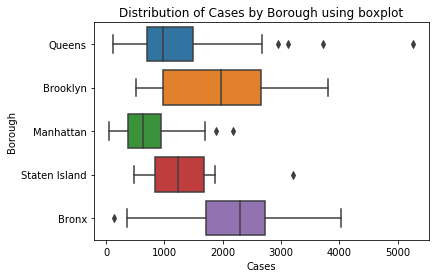

In [10]:
sns.boxplot(x = ny_df['Cases'], y = ny_df['Borough'])
plt.title('Distribution of Cases by Borough using boxplot')

Text(0.5, 1.0, 'Distributions of Deaths by Borough using boxplot')

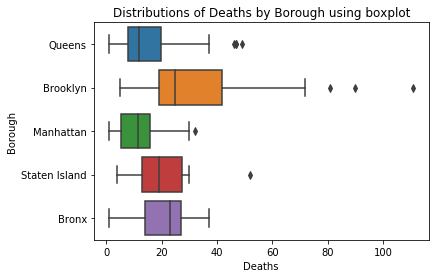

In [11]:
sns.boxplot(x = ny_df['Deaths'], y = ny_df['Borough'])
plt.title('Distributions of Deaths by Borough using boxplot')

In [12]:
agg_df = ny_df.groupby('Borough').sum().reset_index()
agg_df

,Borough,Cases,Cases_per_10000,Deaths,Deaths_per_10000
0,Bronx,53715,93208,521,906
1,Brooklyn,69064,97185,1308,1820
2,Manhattan,31014,77457,500,1429
3,Queens,73119,181080,915,2347
4,Staten Island,16327,41225,252,609


<BarContainer object of 5 artists>

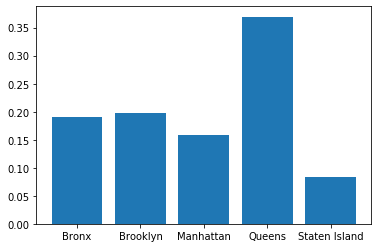

In [13]:
plt.bar(agg_df['Borough'],agg_df['Cases_per_10000']/agg_df['Cases_per_10000'].sum())

<BarContainer object of 5 artists>

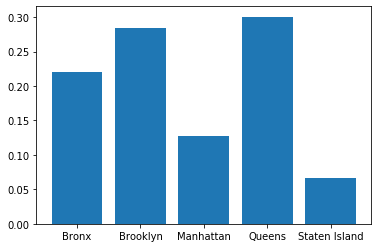

In [14]:
plt.bar(agg_df['Borough'],agg_df['Cases']/agg_df['Cases'].sum())